# Clasificación con Perceptrón


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

np.random.seed(0)

## Generación de los datos


In [15]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=0.5,
                           random_state=1)
y[y == 0] = -1

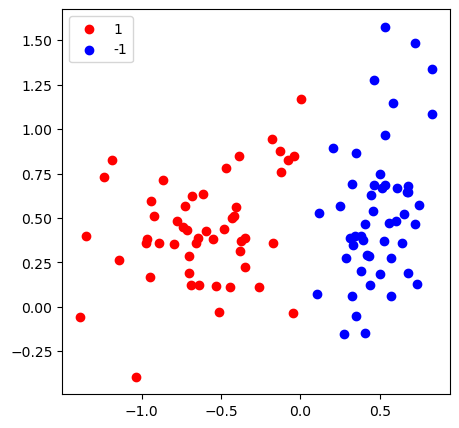

In [13]:
fix, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            color='red', marker='o', label='1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1],
            color='blue', marker='o', label='-1')
plt.legend(loc='upper left')
plt.show()

## División de los datos en entrenamiento y prueba


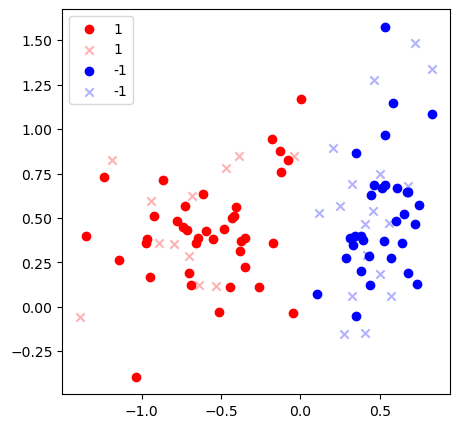

In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.7, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1],
            color='red', marker='o', label='1')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1],
            color='red', marker='x', label='1', alpha=0.3)
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1],
            color='blue', marker='o', label='-1')
plt.scatter(X_val[y_val == -1][:, 0], X_val[y_val == -1][:, 1],
            color='blue', marker='x', label='-1', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

## Entrenamiento del modelo


In [20]:
model = Perceptron(random_state=0)
model.fit(X_train, y_train)

Perceptron()

## Predicción y evaluación del modelo


In [22]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_accuracy = (y_train == y_train_pred).mean()
val_accuracy = (y_val == y_val_pred).mean()

print(f'train accuracy: {train_accuracy:.2f}')
print(f'val accuracy: {val_accuracy:.2f}')

train accuracy: 1.00
val accuracy: 1.00


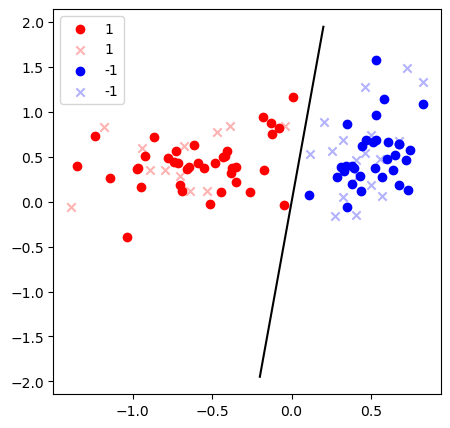

In [33]:
# Get line
w = model.coef_[0]
b = model.intercept_
def f(x): return -(w[0] * x + b) / w[1]


x = np.linspace(-0.2, 0.2)

plt.figure(figsize=(5, 5))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1],
            color='red', marker='o', label='1')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1],
            color='red', marker='x', label='1', alpha=0.3)
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1],
            color='blue', marker='o', label='-1')
plt.scatter(X_val[y_val == -1][:, 0], X_val[y_val == -1][:, 1],
            color='blue', marker='x', label='-1', alpha=0.3)
plt.plot(x, f(x), color='black')
plt.legend(loc='upper left')
plt.show()